<a href="https://colab.research.google.com/github/LorenzoLiu75/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction Menggunakan Binary Classification (Neural Network)

Anggota :
1.   Pieter Tanoto (Accuracy & Model Loss Plot , Testing Program)
2.   Rizky Maulana Sembiring (Data Wrangling)
3.   Annisa Khairina (Data Validation & Model Creation)
4.   Lorenzo Liunardo (Data Training & Evaluation)
5.   Andhika Mandalanta Saragih (Data Cleansing)
6.   Tiur Asria Tampubolon (Import Library & Load Dataset)


## Import Library

In [ ]:
import pandas as pd # digunakan untuk manipulasi dan analisis data
import numpy as np # digunakan untuk komputasi numerik dalam python
import tensorflow as tf # digunakan untuk membangun, melatih dan menerapkan model pembelajaran mesin
from tensorflow import keras # digunakan untuk membangun dan melatih model menggunakan jaringan neural networks
from matplotlib import pyplot as plt # digunakan untuk plotting data
%matplotlib inline

## Load Dataset

Dataset Download: [**breast_cancer_wisconsin.csv**](https://drive.google.com/uc?export=download&id=1-AkM9auFyqrFvf6MklK8imZx66ItVY8Z "Breast Cancer Dataset")

In [ ]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_wisconsin.csv to breast_cancer_wisconsin (1).csv


In [ ]:
# membaca data
df = pd.read_csv('breast_cancer_wisconsin.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Data Preprocessing

### Data Wrangling

In [ ]:
# menampilkan kolom dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# memilih kolom yang diperlukan untuk proses pengujian
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [ ]:
# menampilkan kembali dataset yang sudah difilter kolomnya
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
# menampikan isi dari kolom diagnosis
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Disini **'M'** digunakan untuk menunjukkan status ***malignant*** yang artinya kanker tersebut bersifat ganas sedangkan **'B'** menunjukkan status ***benign*** yang artinya kanker tersebut bersifat jinak

### Data Cleansing

In [ ]:
# melihat seluruh kolom beserta dengan type data nya, jumlah, unique values dan missing value nya diurutkan secara descending berdasarkan missing values
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})   
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing
0,diagnosis,object,569,2,0
1,radius_mean,float64,569,456,0
2,texture_mean,float64,569,479,0
3,perimeter_mean,float64,569,522,0
4,area_mean,float64,569,539,0
5,smoothness_mean,float64,569,474,0
6,compactness_mean,float64,569,537,0
7,concavity_mean,float64,569,537,0
8,concave points_mean,float64,569,542,0
9,symmetry_mean,float64,569,432,0


In [ ]:
# cek apakah ada data yang duplikat
df.duplicated().sum()

0

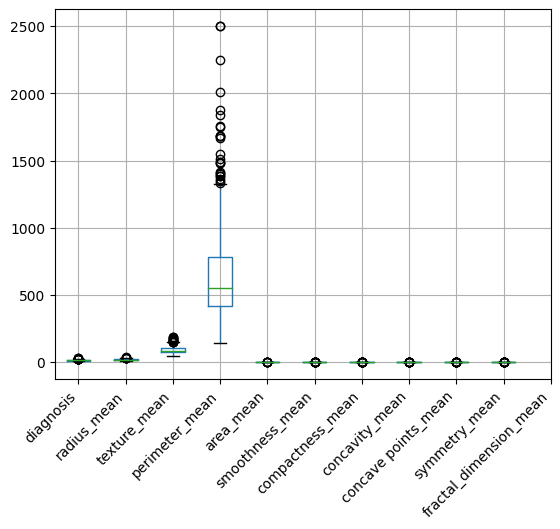

In [ ]:
# menggunakan boxplot untuk melihat apakah ada outliers di tiap kolom dari dataset
df.boxplot(column=list(df.select_dtypes(include=[np.number]).columns))
plt.xticks(np.arange(1, len(df.columns) + 1), df.columns, rotation=45, ha='right')
plt.show()

In [ ]:
# melihat persebaran data tiap kolom
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [ ]:
# function untuk mengecek apakah terdapat outliers dalam data menggunakan IQR
def outliers(df, feature):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  ls = df.index[ (df[feature] < lower_bound) | (df[feature] > upper_bound) ]

  return ls

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [ ]:
# membuat sebuah list dengan nama index_list yang akan menampung index dari outliers dari semua feature yang terdapat pada data
index_list = []
for feature in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']:
               index_list.extend(outliers(df, feature))

index_list

[82,
 108,
 122,
 164,
 180,
 202,
 212,
 236,
 339,
 352,
 369,
 461,
 503,
 521,
 219,
 232,
 239,
 259,
 265,
 455,
 562,
 82,
 108,
 122,
 164,
 180,
 202,
 212,
 236,
 339,
 352,
 461,
 503,
 521,
 23,
 82,
 108,
 122,
 164,
 180,
 202,
 212,
 236,
 250,
 265,
 272,
 339,
 352,
 368,
 369,
 372,
 373,
 393,
 449,
 461,
 503,
 521,
 563,
 564,
 3,
 105,
 122,
 504,
 520,
 568,
 0,
 3,
 9,
 12,
 14,
 78,
 82,
 108,
 122,
 181,
 190,
 258,
 351,
 352,
 400,
 567,
 0,
 68,
 78,
 82,
 108,
 112,
 122,
 152,
 180,
 202,
 212,
 258,
 351,
 352,
 400,
 461,
 563,
 567,
 78,
 82,
 108,
 122,
 180,
 202,
 212,
 352,
 393,
 461,
 3,
 22,
 25,
 60,
 78,
 108,
 122,
 146,
 150,
 152,
 258,
 288,
 323,
 424,
 561,
 3,
 9,
 68,
 71,
 78,
 151,
 152,
 176,
 258,
 318,
 376,
 379,
 504,
 505,
 507]

In [ ]:
# function untuk menghapus data yang termasuk outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
# variable df_cleaned akan memanggil function remove dan menyimpan data yang outliers nya sudah dihapus
df = remove(df, index_list)
# mengecek jumlah baris dan kolom setelah outliers sudah dihapus
df.shape

(502, 11)

## Data Validation

In [ ]:
# kita gunakan replace untuk mengganti M menjadi 1 dan B menjadi 0 agar
# nantinya dapat digunakan untuk proses binary classification
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)

In [ ]:
# menampilkan info tipe data dan frekuensi tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 566
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               502 non-null    int64  
 1   radius_mean             502 non-null    float64
 2   texture_mean            502 non-null    float64
 3   perimeter_mean          502 non-null    float64
 4   area_mean               502 non-null    float64
 5   smoothness_mean         502 non-null    float64
 6   compactness_mean        502 non-null    float64
 7   concavity_mean          502 non-null    float64
 8   concave points_mean     502 non-null    float64
 9   symmetry_mean           502 non-null    float64
 10  fractal_dimension_mean  502 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 47.1 KB


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [ ]:
# membuat variabel X yang akan menyimpan variabel independen dan variabel y
# yang akan mwnyimpan variabel dependen
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = df['diagnosis']

# Model Creation


In [ ]:
from sklearn import preprocessing # menyediakan fungsi preprocessing data

# melakukan penskalaan fitur dengan metode Min-Max Scaling. Metode ini 
# mengubah fitur-fitur menjadi rentang yang lebih kecil, yaitu dari 0 hingga 1.
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.99853038, 0.39782823, 0.94787789, ..., 0.47767189, 0.49922601,
        0.23601829],
       [0.93386729, 0.56959526, 0.9170301 , ..., 0.87066031, 0.69814241,
        0.35279634],
       [0.97795576, 0.22852912, 0.97127965, ..., 0.71000681, 0.49690402,
        0.31199437],
       ...,
       [0.51943567, 0.86080948, 0.50622274, ..., 0.29298843, 0.28637771,
        0.41329581],
       [0.96619884, 0.91510365, 0.9297947 , ..., 0.66650783, 0.45278638,
        0.18888498],
       [0.70681167, 0.90671273, 0.6862036 , ..., 0.3609258 , 0.32739938,
        0.22933521]])

In [ ]:
# membagi dataset menjadi training set dan test set dimana
# 70% data dipakai untuk training dan 30% untuk testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X_scale, y, test_size=0.3
)

In [ ]:
# Mengubah tipe data variabel y_train dan y_test menjadi float
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

## Data Training

In [ ]:
# Membangun model neural network yaitu binary classification
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
  Dense(1024, activation='relu', input_shape=[10]), # 10 input, 1024 neuron
  Dense(1024, activation='relu'), # 1024 neuron
  Dense(1, activation='sigmoid'), # 1 output
])

# Fungsi aktivasi sigmoid digunakan untuk masalah klasifikasi biner, 
# di mana output yang dihasilkan berada dalam rentang antara 0 dan 1

In [ ]:
# Konfigurasi model
model.compile(
  optimizer='adam', # optimizer Adam digunakan untuk optimasi
  loss='binary_crossentropy', # binary cross entropy untuk binary classification
  metrics=['binary_accuracy'], # mengukur persentase jumlah prediksi benar terhadap total data
)

In [ ]:
# Melatih model 
h = model.fit(X_train, y_train, epochs=30) 

Epoch 1/30
11/11 [==============================] - 1s 21ms/step - loss: 0.5369 - binary_accuracy: 0.7721
Epoch 2/30
11/11 [==============================] - 0s 24ms/step - loss: 0.2830 - binary_accuracy: 0.8775
Epoch 3/30
11/11 [==============================] - 0s 23ms/step - loss: 0.1946 - binary_accuracy: 0.9231
Epoch 4/30
11/11 [==============================] - 0s 22ms/step - loss: 0.1768 - binary_accuracy: 0.9288
Epoch 5/30
11/11 [==============================] - 0s 22ms/step - loss: 0.1460 - binary_accuracy: 0.9345
Epoch 6/30
11/11 [==============================] - 0s 24ms/step - loss: 0.1432 - binary_accuracy: 0.9259
Epoch 7/30
11/11 [==============================] - 0s 25ms/step - loss: 0.1496 - binary_accuracy: 0.9487
Epoch 8/30
11/11 [==============================] - 0s 24ms/step - loss: 0.1249 - binary_accuracy: 0.9430
Epoch 9/30
11/11 [==============================] - 0s 22ms/step - loss: 0.1168 - binary_accuracy: 0.9459
Epoch 10/30
11/11 [===========================

In [ ]:
# Mengevaluasi model yang sudah dibuat
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.1797 - binary_accuracy: 0.9536


[0.17974278330802917, 0.9536423683166504]

Dari hasil evaluasi, didapatkan nilai akurasi sebesar 95,36% persen yang menunjukkan bahawa model memiliki tingkat akurasi yang cukup tinggi dan nilai loss sebesar 0.1797 yang rendah yang menandakan bahwa model yang dibuat ini mempunyai hasil yang baik.

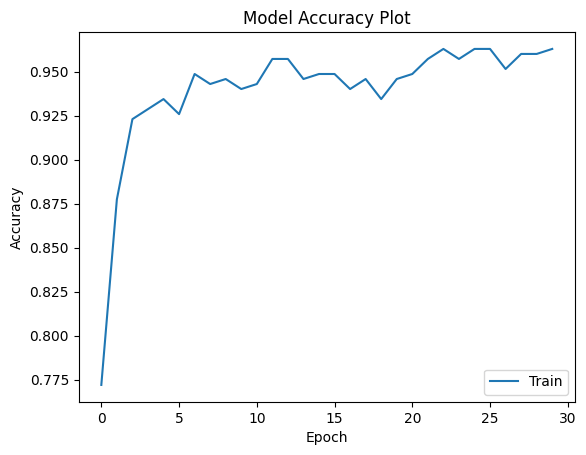

In [ ]:
# Menampilkan akurasi model dalam bentuk plot
plt.plot(h.history['binary_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Penjelasan Plot : Dalam grafik diatas, akurasi model memiliki nilai [ 0.9536423683166504] pada Epoch ke 30 dari yang awalnya kurang dari (<) [0.775] pada Epoch 0. Ini menunjukkan bahwa model Anda memiliki akurasi sekitar 95.364 %, yang berarti model berhasil memprediksi dengan benar sekitar 95.364 % dari semua sampel yang dievaluasi.


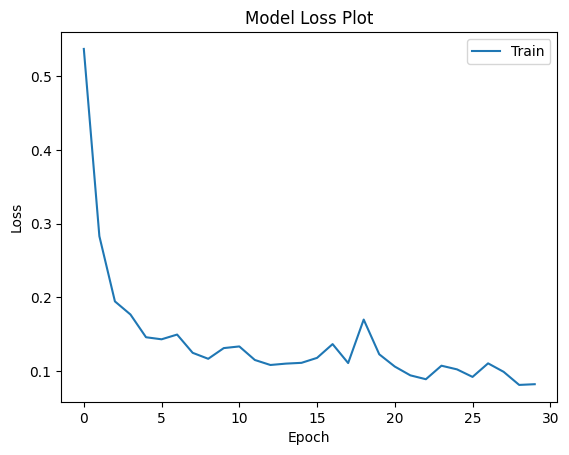

In [ ]:
# Menampilkan model loss dalam bentuk plot
plt.plot(h.history['loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Penjelasan Plot : Dalam grafik diatas, model loss memiliki nilai [0.17974278330802917] pada Epoch ke 30 dari yang awalnya lebih dari (>) [0.5] pada Epoch 0. Nilai ini menunjukkan seberapa besar perbedaan antara prediksi model dengan nilai yang sebenarnya. Semakin rendah nilai loss, semakin baik performa model yang dibuat. Jadi, dalam contoh ini, model memiliki loss yang rendah, yang mengindikasikan bahwa prediksi model secara bertahap memperbaiki prediksinya seiring berjalannya pelatihan.

#Testing Program


In [ ]:
# Data pengujian
x_test = np.array([[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.30010, 0.14710, 0.2419, 0.07871],
                   [16.6, 12.7, 120.0, 1000.0, 0.1, 0.3, 0.3, 0.17, 0.2134, 0.063],
                   [7.76, 24.54, 47.92, 181.0, 0.05263, 0.04362, 0.00000, 0.00000, 0.1587, 0.05884]])

# Melakukan penskalaan pada data pengujian
x_test_scaled = min_max_scaler.transform(x_test)

# Melakukan prediksi menggunakan model
predictions = model.predict(x_test_scaled)

# Mengubah nilai prediksi menjadi label klasifikasi (M = Malignant (Ganas), B = Benign (Jinak))
class_labels = ['B', 'M']

# Menampilkan hasil prediksi
for i in range(len(predictions)):
    predicted_label = class_labels[int(np.round(predictions[i]))]
    print("Hasil Prediksi {}:".format(i+1), predicted_label)

1/1 [==============================] - 0s 101ms/step
Hasil Prediksi 1: M
Hasil Prediksi 2: M
Hasil Prediksi 3: B


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#Conclusion


Kesimpulan:

Program breast cancer detection yang telah dibuat menggunakan binary classification (neural networks) mampu mencapai tingkat akurasi antara 94% hingga 96% dengan tingkat kehilangan (model loss) sebesar 9% hingga 18%. Hal ini menunjukkan bahwa program tersebut memiliki performa yang baik dalam mengklasifikasikan apakah pasien mengidap kanker payudara atau tidak.

Dengan tingkat akurasi yang tinggi, yaitu antara 94% hingga 96%, program dapat memberikan prediksi yang akurat dalam mengidentifikasi pasien yang terkena kanker payudara. Tingkat akurasi ini menunjukkan bahwa sebagian besar pasien dengan kanker payudara dapat terdeteksi dengan benar oleh program.

Selain itu, tingkat kehilangan (model loss) program yang berkisar antara 9% hingga 18% juga cukup rendah. Hal ini menunjukkan bahwa program memiliki kemampuan yang baik dalam meminimalkan kesalahan atau ketidakcocokan antara prediksi dan nilai sebenarnya.

Dengan tingkat akurasi yang tinggi dan tingkat kehilangan yang rendah, program breast cancer detection ini dapat digunakan sebagai alat yang berguna dalam membantu diagnosis dini kanker payudara. Dengan mendeteksi kanker payudara pada tahap awal, pasien dapat segera mendapatkan perawatan yang tepat, meningkatkan peluang kesembuhan, dan mengurangi dampak yang ditimbulkan oleh penyakit ini.

Namun, perlu diingat bahwa hasil prediksi dari program ini masih memerlukan verifikasi lebih lanjut oleh tenaga medis yang berkualifikasi. Program ini sebaiknya digunakan sebagai alat pendukung dan bukan sebagai pengganti diagnosa dan perawatan medis yang profesional.

Dengan demikian, program breast cancer detection dengan tingkat akurasi 94% hingga 96% dan tingkat kehilangan 9% hingga 18% memiliki potensi besar dalam membantu deteksi dini kanker payudara dan meningkatkan kesempatan penyembuhan pasien.